# Airline Fleet Performance & Maintenance Analytics

### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Data Loading & Initial Checks

In [ ]:
df = pd.read_csv("Fleet.csv")
df.shape

(50, 12)

In [5]:
df.head()

,Airline,Aircraft_Model,Registration_ID,Year_Built,Seats,Engine_Type,Range_km,Fuel_Burn_L_hr,Status,Age,Age_Groups,Unnamed: 11
0,Air India,A320neo,A4691,2014,187,Rolls-Royce XWB,15529,2875,Active,10,Mid-life,NaN
1,United Airlines,Boeing 787-9,E3036,1998,769,Pratt & Whitney PW4000,7880,11764,Active,26,Old,NaN
2,Lufthansa,Embraer E190,B3731,2011,151,Rolls-Royce XWB,11921,12380,Active,13,Mid-life,NaN
3,Delta Airlines,Boeing 737 MAX,C7193,2013,294,CFM56,6948,11077,Retired,11,Mid-life,NaN
4,Singapore Airlines,Airbus A350,A3380,2020,778,GE Genx,12185,2168,Active,4,New,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          50 non-null     object 
 1   Aircraft_Model   50 non-null     object 
 2   Registration_ID  50 non-null     object 
 3   Year_Built       50 non-null     int64  
 4   Seats            50 non-null     int64  
 5   Engine_Type      50 non-null     object 
 6   Range_km         50 non-null     int64  
 7   Fuel_Burn_L_hr   50 non-null     int64  
 8   Status           50 non-null     object 
 9   Age              50 non-null     int64  
 10  Age_Groups       50 non-null     object 
 11  Unnamed: 11      0 non-null      float64
dtypes: float64(1), int64(5), object(6)
memory usage: 4.8+ KB


### Univariate Analysis

##### Fleet Status Distribution

In [7]:
df["Status"].value_counts()


Status
Active               22
Under Maintenance    16
Retired              12
Name: count, dtype: int64

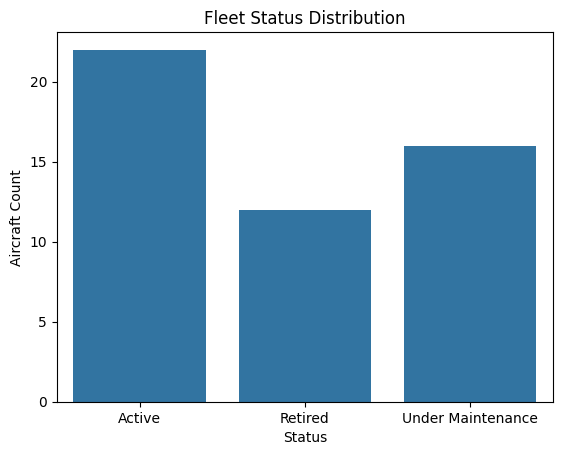

In [8]:
sns.countplot(data=df, x="Status")
plt.title("Fleet Status Distribution")
plt.xlabel("Status")
plt.ylabel("Aircraft Count")
plt.show()


##### Aircraft Age Distribution

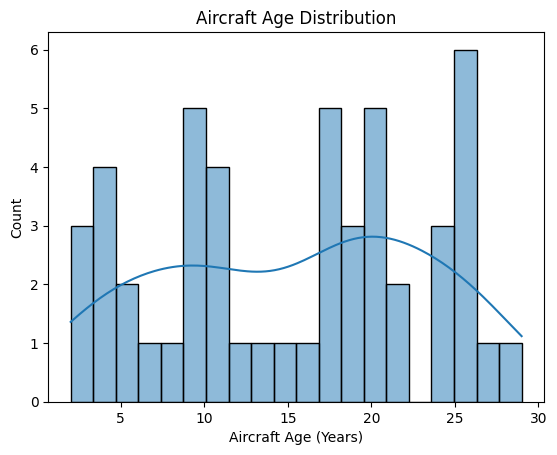

In [9]:
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Aircraft Age Distribution")
plt.xlabel("Aircraft Age (Years)")
plt.show()


##### Engine Type Distribution

In [10]:
df["Engine_Type"].value_counts()


Engine_Type
Rolls-Royce XWB           11
GE Genx                    9
Rolls-Royce Trent          8
IAE V2500                  7
Pratt & Whitney PW4000     6
CFM56                      5
CFM LEAP-1A                4
Name: count, dtype: int64

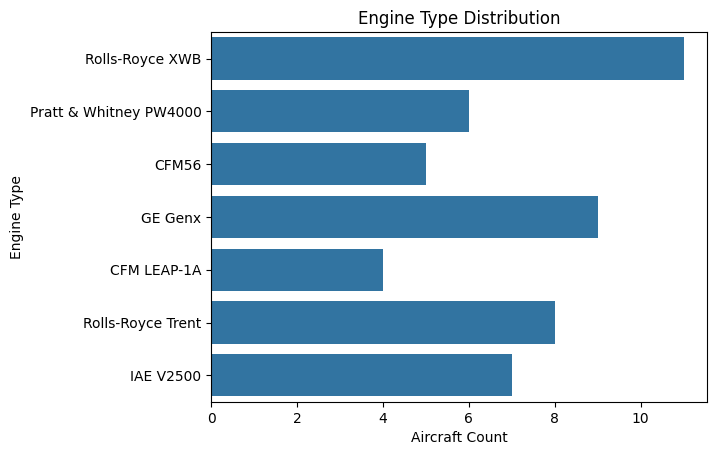

In [11]:
sns.countplot(data=df, y="Engine_Type")
plt.title("Engine Type Distribution")
plt.ylabel("Engine Type")
plt.xlabel("Aircraft Count")
plt.show()


### Bivariate Analysis

##### Age vs Status

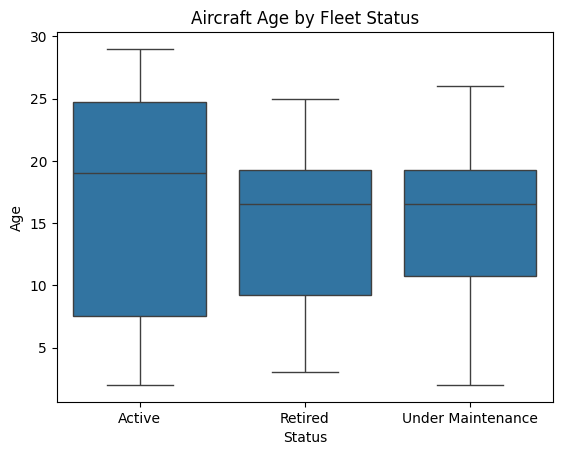

In [12]:
sns.boxplot(data=df, x="Status", y="Age")
plt.title("Aircraft Age by Fleet Status")
plt.show()


##### Seats vs Fuel Burn

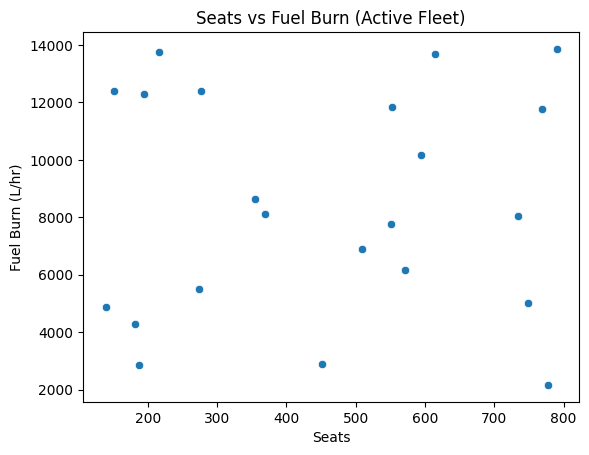

In [13]:
sns.scatterplot(
    data=df[df["Status"] == "Active"],
    x="Seats",
    y="Fuel_Burn_L_hr"
)
plt.title("Seats vs Fuel Burn (Active Fleet)")
plt.xlabel("Seats")
plt.ylabel("Fuel Burn (L/hr)")
plt.show()


##### Aircraft Model vs Average Age (Top Models)

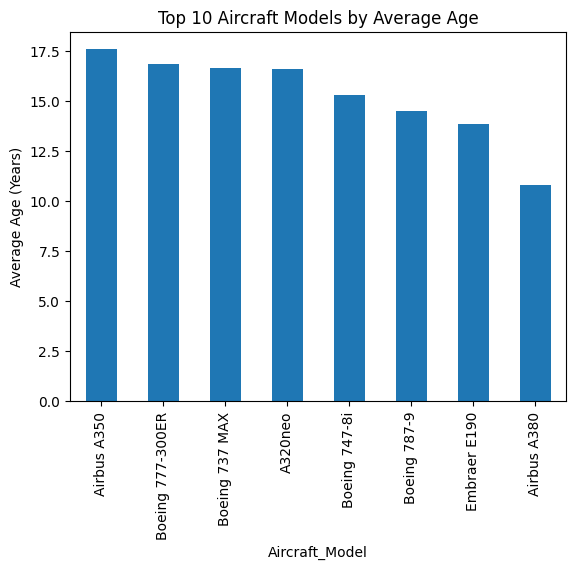

In [14]:
model_age = (
    df.groupby("Aircraft_Model")["Age"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

model_age.plot(kind="bar")
plt.title("Top 10 Aircraft Models by Average Age")
plt.ylabel("Average Age (Years)")
plt.show()


### Multivariate Analysis

##### Fuel Burn per Seat (EDA Metric)

In [15]:
df["Fuel_Burn_Per_Seat"] = df["Fuel_Burn_L_hr"] / df["Seats"]


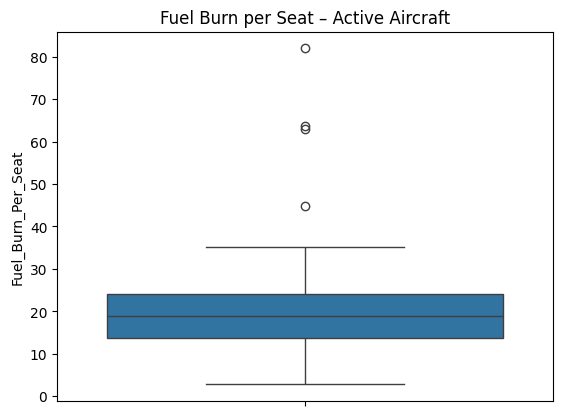

In [16]:
sns.boxplot(
    data=df[df["Status"] == "Active"],
    y="Fuel_Burn_Per_Seat"
)
plt.title("Fuel Burn per Seat – Active Aircraft")
plt.show()


##### Engine Type vs Age (Risk Lens)

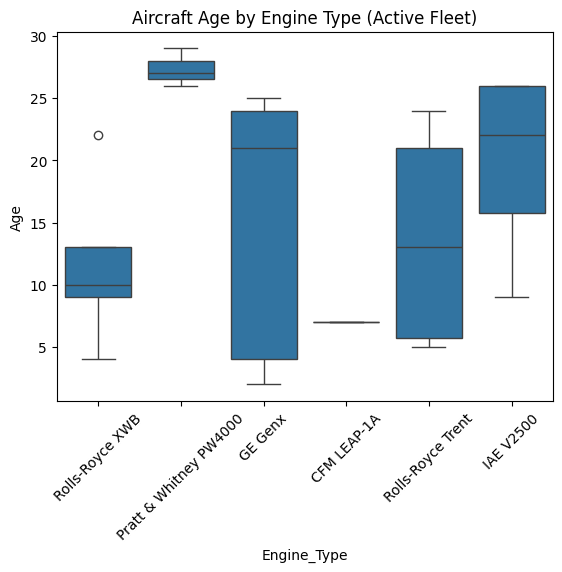

In [17]:
sns.boxplot(
    data=df[df["Status"] == "Active"],
    x="Engine_Type",
    y="Age"
)
plt.title("Aircraft Age by Engine Type (Active Fleet)")
plt.xticks(rotation=45)
plt.show()


### Airline-Level EDA

##### Fleet Size by Airline

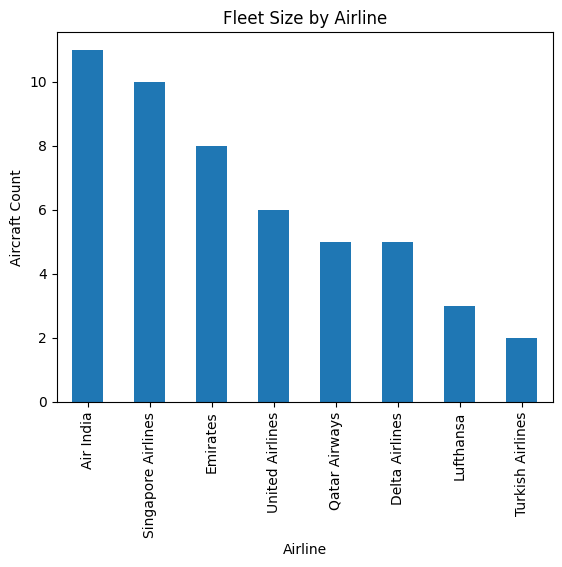

In [18]:
airline_counts = df["Airline"].value_counts()

airline_counts.plot(kind="bar")
plt.title("Fleet Size by Airline")
plt.ylabel("Aircraft Count")
plt.show()


##### Airline vs Average Aircraft Age

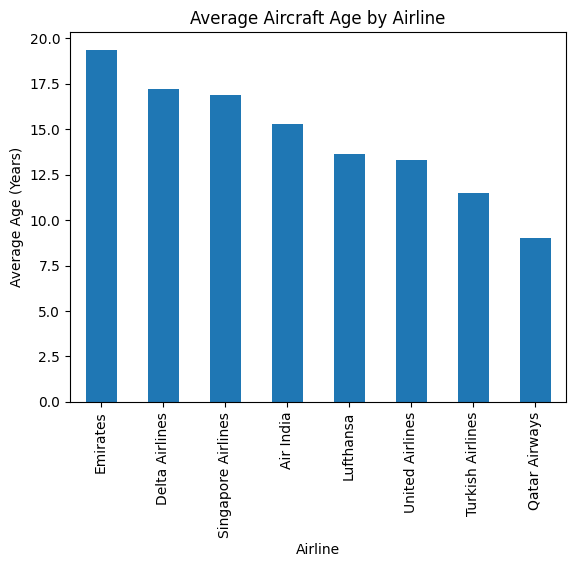

In [19]:
airline_age = (
    df.groupby("Airline")["Age"]
    .mean()
    .sort_values(ascending=False)
)

airline_age.plot(kind="bar")
plt.title("Average Aircraft Age by Airline")
plt.ylabel("Average Age (Years)")
plt.show()
